# Sales Prediction for Big Mart Outlets

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
Also,certain attributes of each product and store have been defined. The aim is to build a predictive model and predict 
the sales of each product at a particular outlet.

Using this model,BigMart will try to understand the properties of products and outlets which play a key role in 
increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical 
glitches.Hence, it will be required to treat them accordingly.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading train data into python environment
tr=pd.read_csv('train_data.csv')
tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
# Reading test data into python environment
ts=pd.read_csv('test_data.csv')
ts

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
# Reading the sample_submission_data into python environment
submission=pd.read_csv('sample_submission_data.csv')
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


<AxesSubplot:>

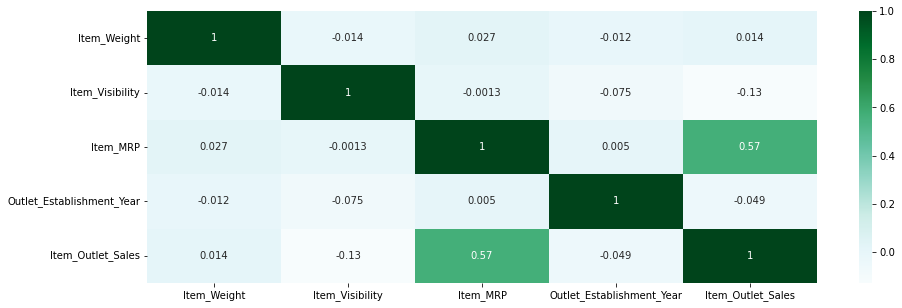

In [6]:
# Correlation Matrix
corrmatrix=tr.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix,annot=True,cmap='BuGn')

In [ ]:
Item_Outlet_Sales is highly correlated with Item_MRP.We are not doing Feature Selection

# Exploratory Data Analysis (EDA)

In [7]:
tr.shape

(8523, 12)

In [8]:
ts.shape

(5681, 11)

In [9]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier, Outlet_Size,Outlet_Location_Type and Outlet_Type are
object data types

In [11]:
tr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
ts.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


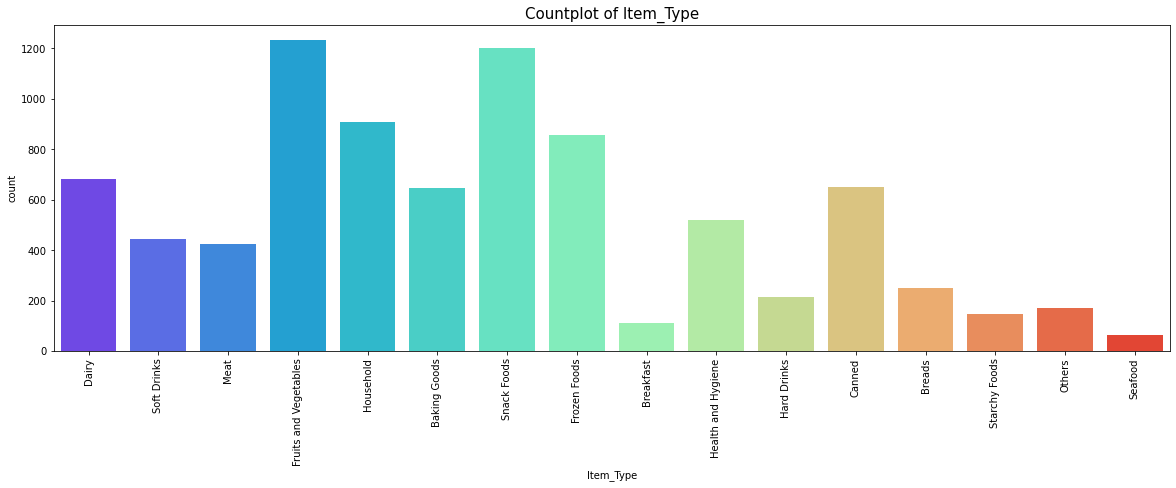

In [13]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(tr['Item_Type'],palette='rainbow')
plt.title('Countplot of Item_Type',fontsize=15)
plt.show()

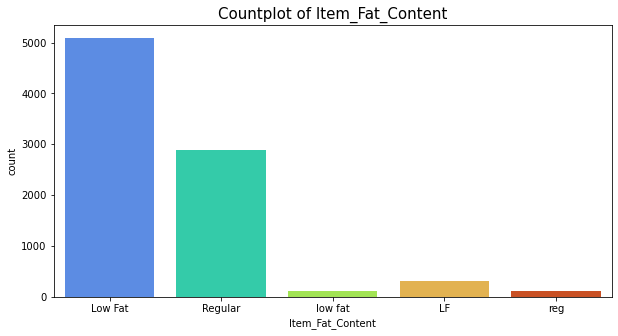

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(tr['Item_Fat_Content'],palette='turbo')
plt.title('Countplot of Item_Fat_Content',fontsize=15)
plt.show()

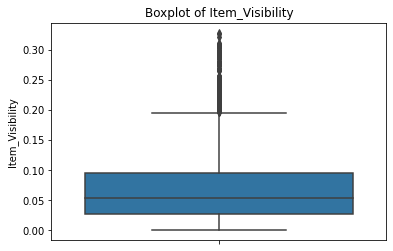

In [15]:
sns.boxplot(y=tr['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

In [16]:
tr['Item_Visibility'].min()

0.0

In [17]:
ts['Item_Visibility'].min()

0.0

Item_Visibility cannot be zero.So we can impute the missing information with median as there are many outliers.

In [18]:
tr['Item_Visibility']=tr['Item_Visibility'].replace(0,tr['Item_Visibility'].median())
ts['Item_Visibility']=ts['Item_Visibility'].replace(0,ts['Item_Visibility'].median())

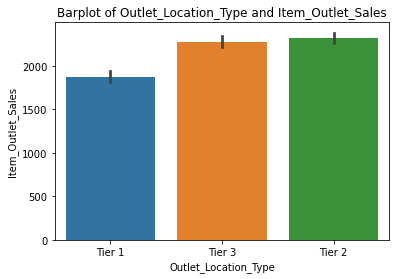

In [19]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=tr)
plt.title('Barplot of Outlet_Location_Type and Item_Outlet_Sales')
plt.show()

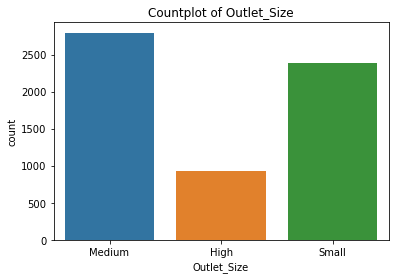

In [20]:
sns.countplot(tr['Outlet_Size'])
plt.title('Countplot of Outlet_Size')
plt.show()

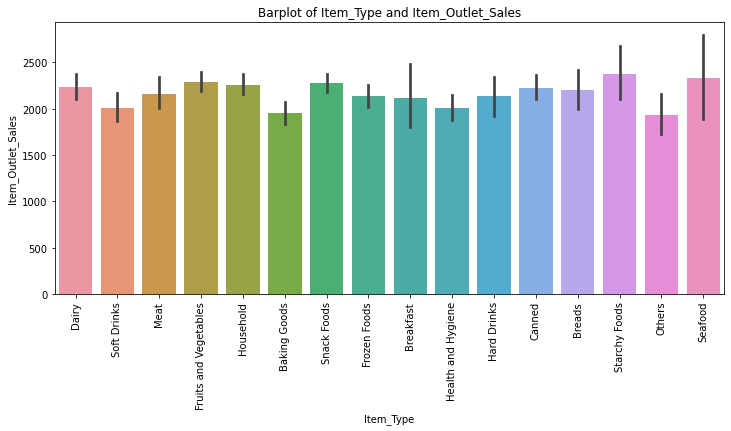

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=tr)
plt.title('Barplot of Item_Type and Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [22]:
# Finding Null values in train data
tr.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
# Finding Null values in test data
ts.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are null values in Item_Weight and Outlet_Size

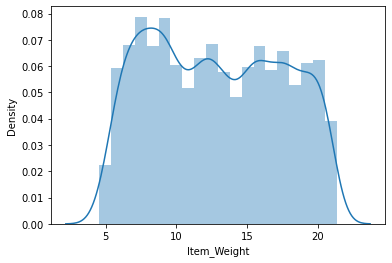

In [24]:
sns.distplot(tr['Item_Weight'])
plt.show()

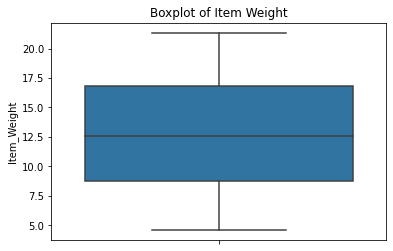

In [25]:
sns.boxplot(y=tr['Item_Weight'])
plt.title('Boxplot of Item Weight')
plt.show()

There are no outliers in the column Item_Weight

In [26]:
# Filling missing values in the column 'Item_Weight' with mean
tr['Item_Weight']=tr['Item_Weight'].fillna(tr['Item_Weight'].mean())
ts['Item_Weight']=ts['Item_Weight'].fillna(ts['Item_Weight'].mean())

In [27]:
tr['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [28]:
ts['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [29]:
tr['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
tr['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [31]:
# Filling missing values in the column 'Outlet_Size' with mode()[0]
tr['Outlet_Size']=tr['Outlet_Size'].fillna(tr['Outlet_Size'].mode()[0])
ts['Outlet_Size']=ts['Outlet_Size'].fillna(ts['Outlet_Size'].mode()[0])

In [32]:
tr.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
ts.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [34]:
tr['Item_Identifier'].nunique()

1559

In [35]:
tr['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
tr['Item_Fat_Content']=tr['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular',})
ts['Item_Fat_Content']=ts['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular',})

In [37]:
tr['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
tr['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [39]:
tr['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [40]:
tr['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [41]:
tr['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
tr['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [43]:
# The data is from 2013. So we can create a new column calculating the age of outlets
tr['Outlet_Age']=2013-tr['Outlet_Establishment_Year']
ts['Outlet_Age']=2013-ts['Outlet_Establishment_Year']

In [44]:
# 'Item_Identifier' and 'Outlet_Identifier' are just Ids.Hence dropping these two and also 'Outlet_Establishment_Year'.
tr.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
ts.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [46]:
# One Hot Encoding
tr=pd.get_dummies(tr,columns=['Item_Fat_Content','Outlet_Size'])
ts=pd.get_dummies(ts,columns=['Item_Fat_Content','Outlet_Size'])

In [47]:
tr['Outlet_Location_Type']=tr['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
tr['Outlet_Type']=tr['Outlet_Type'].map({ 'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
tr['Item_Type']=lab_enc.fit_transform(tr['Item_Type'])

In [48]:
ts['Outlet_Location_Type']=ts['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
ts['Outlet_Type']=ts['Outlet_Type'].map({ 'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
ts['Item_Type']=lab_enc.fit_transform(ts['Item_Type'])

In [49]:
tr.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,9.30,0.016047,4,249.8092,1,1,3735.1380,14,1,0,0,1,0
1,5.92,0.019278,14,48.2692,3,2,443.4228,4,0,1,0,1,0
2,17.50,0.016760,10,141.6180,1,1,2097.2700,14,1,0,0,1,0
3,19.20,0.053931,6,182.0950,3,0,732.3800,15,0,1,0,1,0
4,8.93,0.053931,9,53.8614,3,1,994.7052,26,1,0,1,0,0


In [50]:
ts.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,20.750000,0.007565,13,107.8622,1,1,14,1,0,0,1,0
1,8.300000,0.038428,4,87.3198,2,1,6,0,1,0,1,0
2,14.600000,0.099575,11,241.7538,3,0,15,1,0,0,1,0
3,7.315000,0.015388,13,155.0340,2,1,6,1,0,0,1,0
4,12.695633,0.118599,4,234.2300,3,3,28,0,1,0,1,0


# Splitting into Feature and Target

In [51]:
X=tr.drop('Item_Outlet_Sales',axis=1)
y=tr['Item_Outlet_Sales']

In [52]:
# Splitting the data named tr into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Linear Regression Model 

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model1=LinearRegression().fit(X_train,y_train)
predictions1=model1.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Square Error : ',mean_squared_error(y_test,predictions1))
print('R Squared Value : ',r2_score(y_test,predictions1))
print('Mean Absolute Error : ',mean_absolute_error(y_test,predictions1))

Mean Square Error :  1266980.1987139957
R Squared Value :  0.5338505694836042
Mean Absolute Error :  845.1556044367276


# Lasso Regression Model

In [56]:
from sklearn.linear_model import Lasso

In [57]:
model2=Lasso(alpha=1)
model2.fit(X_train,y_train)
predictions2=model2.predict(X_test)

In [58]:
print('Mean Square Error : ',mean_squared_error(y_test,predictions2))
print('R Squared Value : ',r2_score(y_test,predictions2))
print('Mean Absolute Error : ',mean_absolute_error(y_test,predictions2))

Mean Square Error :  1265593.6196273752
R Squared Value :  0.5343607219329085
Mean Absolute Error :  843.9457816545655


# Random Forest Regression Model

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model3=RandomForestRegressor().fit(X_train,y_train)
predictions3=model3.predict(X_test)

In [61]:
print('Mean Square Error : ',mean_squared_error(y_test,predictions3))
print('R Squared Value : ',r2_score(y_test,predictions3))
print('Mean Absolute Error : ',mean_absolute_error(y_test,predictions3))

Mean Square Error :  1178253.3487520604
R Squared Value :  0.5664950974906329
Mean Absolute Error :  758.7814106158357


# Exra Trees Regression Model

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
model4=ExtraTreesRegressor().fit(X_train,y_train)
predictions4=model4.predict(X_test)

In [64]:
print('Mean Square Error : ',mean_squared_error(y_test,predictions4))
print('R Squared Value : ',r2_score(y_test,predictions4))
print('Mean Absolute Error : ',mean_absolute_error(y_test,predictions4))

Mean Square Error :  1222393.159098496
R Squared Value :  0.5502551061498231
Mean Absolute Error :  774.2666182557184


Among these 4 Regression Models,Random Forest Regression Model has high R squared value ,0.56


# Training the Model with Train data and making Predictions with Test data

# Linear Regression Model - Predictions

In [65]:
X_of_test=ts

In [66]:
model1=LinearRegression().fit(X_train,y_train)
linear_pred=model1.predict(X_of_test)

In [67]:
linear_pred

array([1919.37948316, 1293.25826808, 1820.85712419, ..., 1606.10886257,
       3237.95160575, 1022.51196592])

In [68]:
# Submission file
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [69]:
submission['Item_Outlet_Sales']=linear_pred
submission['Item_Outlet_Sales']

0       1919.379483
1       1293.258268
2       1820.857124
3       2321.598043
4       4926.141677
           ...     
5676    2451.061040
5677    3125.482823
5678    1606.108863
5679    3237.951606
5680    1022.511966
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [70]:
submission.to_csv('my_submission_lin.csv',index=False)

# Lasso Regression Model - Predictions

In [71]:
model2=Lasso(alpha=1).fit(X_train,y_train)
lasso_pred=model2.predict(X_of_test)

In [72]:
lasso_pred

array([1889.89152794, 1273.85880541, 1836.51927324, ..., 1608.06334896,
       3226.61603347, 1031.13436619])

In [73]:
submission['Item_Outlet_Sales']=lasso_pred
submission['Item_Outlet_Sales']

0       1889.891528
1       1273.858805
2       1836.519273
3       2298.988492
4       4948.505271
           ...     
5676    2422.937721
5677    3158.572572
5678    1608.063349
5679    3226.616033
5680    1031.134366
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [74]:
submission.to_csv('my_submission_las.csv',index=False)

# Random Forest Regression Model - Predictions

In [75]:
model3=RandomForestRegressor().fit(X_train,y_train)
rand_pred=model3.predict(X_of_test)

In [76]:
submission['Item_Outlet_Sales']=rand_pred
submission['Item_Outlet_Sales']

0       1759.030284
1       1211.396468
2        541.674906
3       2540.732748
4       5838.167170
           ...     
5676    2132.683902
5677    2607.905310
5678    1727.657788
5679    3973.354582
5680    1415.896938
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [77]:
submission.to_csv('my_submission_rand.csv',index=False)

# Exra Trees Regression Model - Predictions

In [78]:
model4=ExtraTreesRegressor().fit(X_train,y_train)
ext_pred=model4.predict(X_of_test)

In [79]:
submission['Item_Outlet_Sales']=ext_pred
submission['Item_Outlet_Sales']

0       1695.985682
1       1220.684378
2        579.459056
3       1414.159200
4       5016.004040
           ...     
5676    1838.719886
5677    2181.194090
5678    1938.736362
5679    3914.058434
5680    1695.086852
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [80]:
submission.to_csv('my_submission_ext.csv',index=False)

# Bagging Regression Model - Predictions

In [81]:
from sklearn.ensemble import BaggingRegressor

In [82]:
model8=BaggingRegressor().fit(X_train,y_train)
bag_pred=model8.predict(X_of_test)

In [83]:
submission['Item_Outlet_Sales']=bag_pred
submission['Item_Outlet_Sales']

0       1649.85240
1        901.22688
2        635.70584
3       1901.65796
4       6379.29612
           ...    
5676    2301.67060
5677    1922.49750
5678    1812.97340
5679    4326.96762
5680    1210.89046
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [84]:
submission.to_csv('my_submission_bag.csv',index=False)

# Decision Tree Regression Model - Predictions

In [85]:
from sklearn.tree import DecisionTreeRegressor
model9=DecisionTreeRegressor().fit(X_train,y_train)

In [86]:
model9=DecisionTreeRegressor().fit(X_train,y_train)
dec_pred=model9.predict(X_of_test)

In [87]:
submission['Item_Outlet_Sales']=dec_pred
submission['Item_Outlet_Sales']

0       1693.7952
1        959.4178
2        246.3460
3       2471.4496
4       6024.1584
          ...    
5676    3119.9388
5677    4431.5648
5678     468.7232
5679    7247.2330
5680    1651.1840
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [88]:
submission.to_csv('my_submission_dec.csv',index=False)

# Standard Scaling

In [89]:
# Standard Scaling data named tr
X1=X.drop(['Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small','Outlet_Location_Type','Outlet_Type','Item_Type'],axis=1)

In [90]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.069460,140.992782,15.168133
std,4.226124,0.048893,62.275067,8.371760
min,4.555000,0.003575,31.290000,4.000000
25%,9.310000,0.033085,93.826500,9.000000
50%,12.857645,0.053931,143.012800,14.000000
75%,16.000000,0.094585,185.643700,26.000000
max,21.350000,0.328391,266.888400,28.000000


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
std_scl=StandardScaler()
X1=std_scl.fit_transform(X1)

In [93]:
X1=pd.DataFrame(X1,columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age'])

In [94]:
X1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.127265e-16,-1.293371e-16,-1.644427e-16,-1.060886e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.964716e+00,-1.347634e+00,-1.761688e+00,-1.334103e+00
25%,-8.395053e-01,-7.440196e-01,-7.574307e-01,-7.368218e-01
50%,4.035383e-14,-3.176414e-01,3.243893e-02,-1.395408e-01
75%,7.435985e-01,5.139076e-01,7.170372e-01,1.293934e+00
max,2.009608e+00,5.296196e+00,2.021724e+00,1.532846e+00


In [95]:
X.drop(['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age'],axis=1,inplace=True)

In [96]:
X=pd.concat([X,X1],axis=1)

In [97]:
X

,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,4,1,1,1,0,0,1,0,-0.841872,-1.092518,1.747454,-0.139541
1,14,3,2,0,1,0,1,0,-1.641706,-1.026432,-1.489023,-1.334103
2,10,1,1,1,0,0,1,0,1.098554,-1.077939,0.010040,-0.139541
3,6,3,0,0,1,0,1,0,1.500838,-0.317641,0.660050,-0.020085
4,9,3,1,1,0,1,0,0,-0.929428,-0.317641,-1.399220,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,13,3,1,1,0,1,0,0,-1.418084,-0.259297,1.180783,1.293934
8519,0,2,1,0,1,0,1,0,-1.059578,-0.459767,-0.527301,-0.497909
8520,8,2,1,1,0,0,0,1,-0.534243,-0.701047,-0.897208,-0.736822
8521,13,3,2,0,1,0,1,0,-1.336444,1.549609,-0.607977,-1.334103


In [98]:
# Standard Scaling Test data
X_of_test=ts
X2=X_of_test.drop(['Item_Fat_Content_Low Fat','Item_Fat_Content_Regular','Outlet_Size_High','Outlet_Size_Medium','Outlet_Size_Small','Outlet_Location_Type','Outlet_Type','Item_Type'],axis=1)

In [99]:
std_scl=StandardScaler()
X2=std_scl.fit_transform(X2)

In [100]:
X2=pd.DataFrame(X2,columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age'])

In [101]:
X_of_test.drop(['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age'],axis=1,inplace=True)

In [102]:
X_of_test=pd.concat([X_of_test,X2],axis=1)

In [103]:
# Splitting data named tr into train and test after Scaling
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Training the Model with Train data and making Predictions with Test data after Standard Scaling

# Linear Regression Model - Predictions


In [104]:
model5=LinearRegression().fit(X_train,y_train)
linear_pred_scl=model5.predict(X_of_test)

In [105]:
submission['Item_Outlet_Sales']=linear_pred_scl
submission['Item_Outlet_Sales']

0       1914.712750
1       1285.733200
2       1831.107665
3       2322.247350
4       4935.320413
           ...     
5676    2450.154765
5677    3126.694989
5678    1602.011503
5679    3245.400085
5680    1013.543463
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [106]:
submission.to_csv('my_submission_li_scl.csv',index=False)

# Lasso Regression - Predictions

In [107]:
model6=Lasso(alpha=1).fit(X_train,y_train)
lasso_pred_scl=model6.predict(X_of_test)

In [109]:
submission['Item_Outlet_Sales']=lasso_pred_scl
submission['Item_Outlet_Sales']

0       1909.328502
1       1279.776879
2       1848.956034
3       2318.448621
4       4935.300414
           ...     
5676    2445.076378
5677    3118.754984
5678    1602.075629
5679    3239.087014
5680    1010.038236
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [110]:
submission.to_csv('my_submission_las_scl.csv',index=False)